# 0.0 Resumo daos testes

## 0.0.1 One Proportion Z-Test

Motivo de uso: Provar se há uma diferença entre a média da amostra e da população. É preciso saber o desvio padrão da população.
<br>Tipo dos dados: Contínuo
<br>Exemplo: Média da altura de uma amostra de pessoas é igual ou diferente da média da altura da população?

## 0.0.2 Two Proportion Z-Test

Motivo de uso: Provar se há diferença entre duas proporções de amostras.
<br>Tipo dos dados: Discreto, que é transformado em contínuo
<br>Exemplo: Existe diferença entre o CTR da página nova com relação a página padrão?

## 0.0.3 One-Way ANOVA

Motivo de uso: Provar se um fator tem impacto na variável resposta. Usado com 3 ou mais grupos.
<br>Tipo dos dados: Dados categóricos influenciam em dados numéricos
<br>Exemplo: Qual tipo de desconto ajuda a melhorar as vendas?

## 0.0.4 Two-Way ANOVA

Motivo de uso: Provar se mais de um fator tem impacto na variável resposta. Usado com 3 ou mais grupos.
<br>Tipo dos dados: Dados categóricos influenciam em dados numéricos
<br>Exemplo: O tipo e a cor de um produto influenciam nas vendas?

## 0.0.5 Chi-Squared Goodness of fit

Motivo de uso: Provar se a variável segue uma distribuição hipotética.
<br>Tipo dos dados: Discretos
<br>Exemplo: A distribuição dada é condinzente com a distribuição hipotética?

## 0.0.6 Chi-Squared Test of Independence

Motivo de uso: Provar se duas variáveis tem associação, mas sem medir essa associação.
<br>Tipo dos dados: Discretos
<br>Exemplo: Mulheres tem uma maior tendência a votar no partido A?

# 0.1 Imports

In [50]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from statsmodels.stats import api as sms
from statsmodels.stats.gof import chisquare_effectsize
from statsmodels.stats.power import GofChisquarePower,TTestIndPower
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.weightstats import ztest
from scipy.stats import f_oneway,bartlett,shapiro,kruskal
from statsmodels.formula.api import ols

# Exercícios

# 1.0 Ads Click Through Rate
Dois anúncios. Anúncio #1 tem 1000 impressões e 20 cliques. Enquanto o Anúncio #2 tem 900 impressões e 30 cliques.

Teste se há diferença entre o CTR do Anúncio #01 e #02

H0: pa = pb - O anúncio 1 tem o mesmo valor de CTR do que o anúncio 2<br>
H1: pa <> pb - O anúncio 1 tem o valor de CTR diferente do anúncio 2

In [18]:
#Two Proportion Z-Test
bult_sucess_A,bult_sample_A = 20,1000
bult_sucess_B,bult_sample_B = 30,900

sucess = np.array([bult_sucess_A,bult_sucess_B])
samples = np.array([bult_sample_A,bult_sample_B])

zscore,pvalue = proportions_ztest(count=sucess, nobs=samples, alternative='two-sided')
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidência suficiente de que o CTR do anúncio 1 não é igual ao anúncio 2')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidência suficiente de que o CTR do anúncio 1 não é igual ao anúncio 2')

P-value: 0.06985234871449321
Falha em rejeitar a hipótese nula
Conclusão: Não há evidência suficiente de que o CTR do anúncio 1 não é igual ao anúncio 2


# 2.0 Acme Toy Company
A empresa Acme Toy imprime cartas de baseball. A empresa afirma que 30% das cartas são de novatos, 60% são de veteranos e 10% são All-Stars.

Uma amostra aleatória de 100 cartas tem 50 cartas de novatos, 45 de veteranos e 5 All-Starts.

A distribuição das cartas é consistente com a afirmação da empresa? Use um nível de significância de 0.05

H0: A proporção de novatos, veteranos e All-Stars é de 30%, 60% e 10%, respectivamente.<br>
H1: Pelo menos uma das proporções da hipótese anterior é falsa.

In [21]:
#Chi-Squared Goodness of fit
observed = [50,45,5]
expected = [30,60,10]

chiscore, pvalue = stats.chisquare(f_obs=observed, f_exp=expected)
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente que pelo menos uma das proporções da hipótese nula é falsa')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente que pelo menos uma das proporções da hipótese nula é falsa')

P-value: 5.591562685637177e-05
Rejeita a hipótese nula
Conclusão: Há evidências suficiente que pelo menos uma das proporções da hipótese nula é falsa


Condições para usar o Chi-squared:
1. Variância: A variância das amostras precisam ser iguais
    - Boxplot
    - Teste
    
2. Normalidade: A população origem das amostras precisa ser normalmente distribuida
    - Distribuição
    - Q-Q Plot
    - Shapiro-Wilk

3. Independencia entre as amostras:
    - Processo de escolha das amostras foi aleatório

# 3.0 Pesquisa Eleitoral
Uma empresa de pesquisa perguntou a preferência de votos entre 1000 eleitores aleatórios, dividido entre homens e mulheres.

O resultado é mostrado na tabela de contingência abaixo.

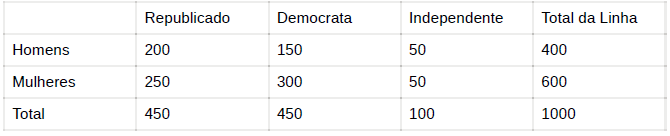

Existe uma diferença entre o eleitores de diferente gênero? As preferências dos homens se diferem significativamente das preferências das mulheres? Use um nível de significância de 0.05

H0: Não há uma dependencia ou relação entre o gênero de uma pessoa e sua preferência por partidos<br>
H1: Há uma dependência ou relação entre o gênero de uma pessoa e dua preferência por partidos.

In [23]:
#Chi-Squared Test of Independence
table = [[200,150,50],[250,300,50]]

chi_squared, pvalue, dof, expected = stats.chi2_contingency(table)
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente para dizer que há uma dependência ou relação entre o gênero e a preferência partidaria das pessoas')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente para dizer que há uma dependência ou relação entre o gênero e a preferência partidaria das pessoas')

P-value: 0.0003029775487145488
Rejeita a hipótese nula
Conclusão: Há evidências suficiente para dizer que há uma dependência ou relação entre o gênero e a preferência partidaria das pessoas


# 4.0 Nota das Meninas
Precisamos determinar se as meninas, na média, tiram uma nota maior do que 600 na prova. Nós temos a informação de que as meninas tem um desvio padrão de nota igual a 100.

Então, nós coletamos dados de 20 meninas usando uma amostragem aleatória e armazenamos na lista abaixo.

Podemos dizer que as meninas, em média, tiram notas maiores que 600? Assumindo um nível de significância de 0.05

H0: A média das notas é igual a 600<br>
H1: A média das notas é maior que 600

In [4]:
#One Proportion Z-Test
data = [650,730,510,670,480,800,690,530,590,620,710,670,640,780,650,490,800,600,510,700]

#Amostra
alpha = 0.05
sample_avg = np.mean(data)
sample_size = len(data)

#população
pop_avg = 600
pop_std = 100

#alternative é larger pois queremos saber se é maior que 600
zscore,pvalue = ztest(data,value=pop_avg, alternative='larger')
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente para dizer que a média de nota das meninas é maior que 600')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente para dizer que a média de nota das meninas é maior que 600')

P-value: 0.03349471703839336
Rejeita a hipótese nula
Conclusão: Há evidências suficiente para dizer que a média de nota das meninas é maior que 600


# 5.0 Entrega da farmácia
Um farmácia afirma que a média do tempo de entrega dos medicamentos é menor do que 120 minutos com desvio padrão de 30 minutos.

Foram selecionadas 49 entregas aleatória e o tempo médio dessas entregas foi de 100 minutos.

Há evidências suficientes para confirmar a afirmação da farmácia com 0.05 de nível de significância?

H0: O tempo de entrega dos medicamentos é igual a 120<br>
H1: O tempo de entrega dos meticamentos é menor que 120

In [12]:
#One Proportion Z-Test

#Amostra
alpha = 0.05
sample_avg = 100
sample_size = 49

#população
pop_avg = 120
pop_std = 30

#Criando um dataset com dados aleatórios e os parâmetros que desejamos
data = np.ceil(np.random.normal(loc=sample_avg, size=sample_size,scale=pop_std)).astype(int)

#alternative é larger pois queremos saber se é maior que 600
zscore,pvalue = ztest(data,value=pop_avg, alternative='smaller')
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente para dizer que o tempo de entrega dos medicamentos é menor que 120 minutos')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente para dizer que o tempo de entrega dos medicamentos é menor que 120 minutos')

P-value: 4.6461546001318463e-07
Rejeita a hipótese nula
Conclusão: Há evidências suficiente para dizer que o tempo de entrega dos medicamentos é menor que 120 minutos


# 6.0 Defeitos na empresa
Uma empresa quer melhorar a qualidade dos produtos reduzindo os defeitos e monitorando a eficiência das linhas de montagem. A linha de montagem A, havia 18 defeitos relatados de 200 amostras selecionadas aleatoriamente, enquanto 25 defeitos de 600 amostras foram relatadas na linha de montagem B.

Há uma diferença entre as linhas de produção em um nível de significância de 0.05?

H0: pa = pb - A proporção do erro é igual para as duas linhas de montagem<br>
H1: pa <> pb - A proporção do erro é diferente para as duas linhas de montagem

In [14]:
#Two Proportion Z-Test
bult_sucess_A,bult_sample_A = 18,200
bult_sucess_B,bult_sample_B = 25,600

sucess = np.array([bult_sucess_A,bult_sucess_B])
samples = np.array([bult_sample_A,bult_sample_B])

zscore,pvalue = proportions_ztest(count=sucess, nobs=samples, alternative='two-sided')
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidência suficiente de que a proporção do erro é diferente para as duas linhas de montagem')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidência suficiente de que a proporção do erro é diferente para as duas linhas de montagem')

P-value: 0.008669375420073044
Rejeita a hipótese nula
Conclusão: Há evidência suficiente de que a proporção do erro é diferente para as duas linhas de montagem


# 7.0 Nível de Educação
Pesquisadores gostariam de saber se o estado civil está associado com o nível de educação. Para isso, eles entrevistaram 300 pessoas aleatoriamente e obtiveram os seguintes resultados:

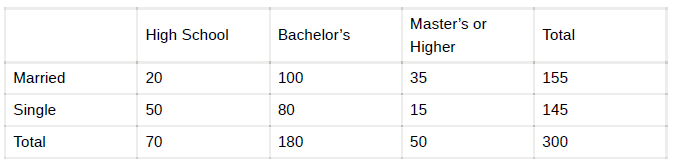

H0: Não há dependência entre o estado civil e o nível de escolaridade<br>
H1: Há uma dependência entre o estado civil e o nível de escolaridade

In [15]:
#Chi-Squared Test of Independence
table = [[20,100,35],[50,80,15]]

chi_squared, pvalue, dof, expected = stats.chi2_contingency(table)
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente para dizer que há uma dependência ou relação entre o estado civil e o nível de escolaridade')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente para dizer que há uma dependência ou relação entre o estado civil e o nível de escolaridade')

P-value: 1.1357109599633353e-05
Rejeita a hipótese nula
Conclusão: Há evidências suficiente para dizer que há uma dependência ou relação entre o estado civil e o nível de escolaridade


# 8.0 Dono da Loja
O dono da loja afirma que um número igual de clientes visitam a sua loja cada dia da semana. Para testar essa hipótese, um Cientista de Dados registrou um número de clientes que visitaram a loja em uma determinada semana e encontrou os seguinte números:

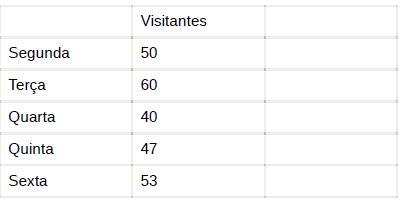

Os dados são consistentes com a afirmação do dono da loja?

H0: O número de visitantes da loja é igual em todos os dias da semana<br>
H1: O número de visitantes da loja não é igual em todos os dias da semana

In [16]:
#Chi-Squared Goodness of fit
observed = [50,60,40,47,53]
expected = [50,50,50,50,50]

chiscore, pvalue = stats.chisquare(f_obs=observed, f_exp=expected)
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente que o número de visitantes da loja não é igual em todos dias')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente que o número de visitantes da loja não é igual em todos dias')

P-value: 0.3594720674366307
Falha em rejeitar a hipótese nula
Conclusão: Não há evidências suficiente que o número de visitantes da loja não é igual em todos dias


# 9.0 Método de estudo
Professores de uma universidade desenvolveram 3 tipos de métodos de aprendizagem: Método Cíclico, Método Linear e Método Pirâmide, para ajudar a performance dos alunos em um importante exame.

Para testar se os três diferentes tipos de aprendizagem impactam na performance dos estudantes, os professores atribuíram aleatoriamente 30 estudantes para aprender um dos métodos de aprendizagem, durante as 3 semanas de preparação.

Todos os estudantes realizaram o mesmo teste e os resultados das suas pontuações são mostrados abaixo:

Determine se a pontuação média é a mesma para todos os 3 grupos.

H0: Não há uma diferença significatica da pontuação média entre os três grupos<br>
H1: Há uma diferença significatica da pontuação média entre os três grupos

In [5]:
#One-Way ANOVA
grupo_ciclico = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group_linear = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group_pirâmide = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

fscore,pvalue = f_oneway(grupo_ciclico,group_linear,group_pirâmide)
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente que há uma diferença de pontuação média entre os três grupos')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente que há uma diferença de pontuação média entre os três grupos')

P-value: 0.11384795345837219
Falha em rejeitar a hipótese nula
Conclusão: Não há evidências suficiente que há uma diferença de pontuação média entre os três grupos


## Premissa #1 - As Variâncias das Amostras são iguais

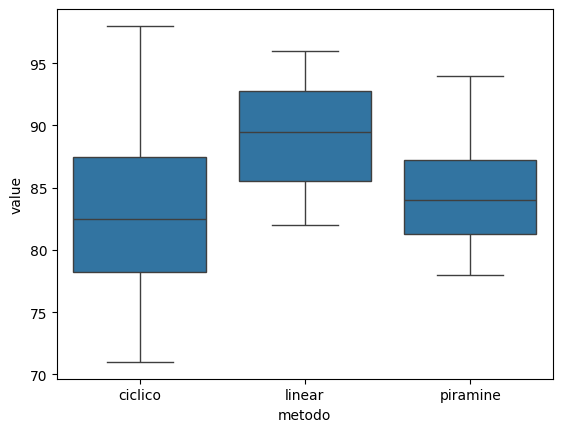

In [43]:
#Boxplot
df_ciclico = pd.DataFrame({'metodo': ['ciclico' for i in range(len(grupo_ciclico))],'value':grupo_ciclico})
df_linear = pd.DataFrame({'metodo': ['linear' for i in range(len(group_linear))],'value':group_linear})
df_piramine = pd.DataFrame({'metodo': ['piramine' for i in range(len(group_pirâmide))],'value':group_pirâmide})

df = pd.concat([df_ciclico,df_linear,df_piramine])

sns.boxplot(x='metodo',y='value',data=df);

H0: A variância é igual para todas as amostras<br>
H1: A viariância não é igual para todas as amostras

In [25]:
#Bartlett's Test
score,pvalue = bartlett(grupo_ciclico,group_linear,group_pirâmide)
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente de que as variâncias não são iguais para todas as amostras')
  print('Viola a premissa')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente de que as variâncias não são iguais para todas as amostras, assumimos a variância igual')
  print('Não viola a premissa')

P-value: 0.19181598314035977
Falha em rejeitar a hipótese nula
Conclusão: Não há evidências suficiente de que as variâncias não são iguais para todas as amostras, assumimos a variância igual
Não viola a premissa


## Premissa #2 - Normalidade

H0: A população das 3 amostras é normalmente distribuídos<br>
H1: A população das 3 amostras não é normalmente distribuídos

In [24]:
#Conjunto de dados apresenta normalidad
score,pvalue = shapiro(df['value'])
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente de que a população não é normalmente distribuída')
  print('Viola a premissa')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente de que a população não é normalmente distribuída, assumimos a normalidade')
  print('Não viola a premissa')

P-value: 0.8451909254938095
Falha em rejeitar a hipótese nula
Conclusão: Não há evidências suficiente de que a população não é normalmente distribuída, assumimos a normalidade
Não viola a premissa


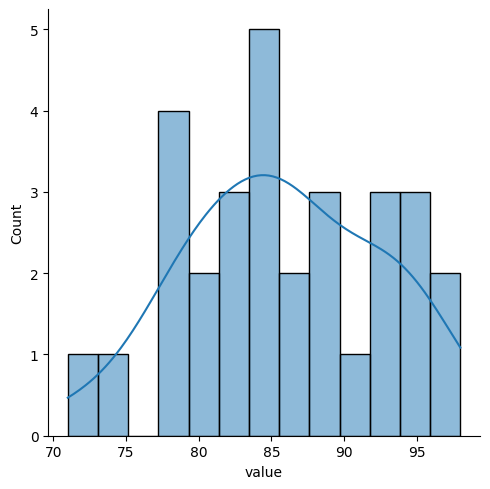

In [42]:
#Histograma
sns.displot(df['value'],kde=True,bins=13);

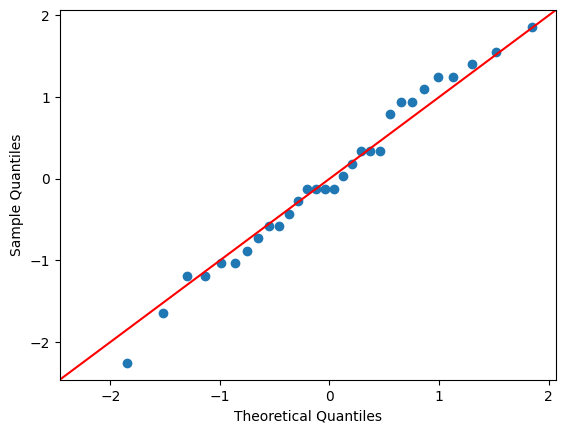

In [41]:
#Q-Q Plot
data_points_1 = np.random.normal(0,1,100)
data_points_2 = df['value']

sm.qqplot(data_points_2,line='45',fit=True)
py.show()

1. Premissa de Normalidade satisfeita<br>
2. Premissa de Variância satisfeita<br>
3. Premissa de Indpendência safisteita

## Kruskal_Wallis Test - Para violação das premissas

H0: Não há uma diferença significatica da pontuação mediana entre os três grupos<br>
H1: Há uma diferença significatica da pontuação mediana entre os três grupos

In [46]:
score,pvalue = kruskal(grupo_ciclico,group_linear,group_pirâmide)
print(f'P-value: {pvalue}')

if pvalue <= 0.05:
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente que há uma diferença de pontuação média entre os três grupos')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente que há uma diferença de pontuação média entre os três grupos')

P-value: 0.11876377341727391
Falha em rejeitar a hipótese nula
Conclusão: Não há evidências suficiente que há uma diferença de pontuação média entre os três grupos


# 10.0 Campanha de Marketing
Um Cientista de Dados alocado dentro do departamento de Marketing, recebe a missão de entender se o formato dos anúncios e o nível de investimento em diferentes campanhas influenciam a métrica de CTR ( Click-Through Rate ) do anúncio.

O Cientista de Dados pediu ao time de Marketing que criassem 40 campanhas com diferentes combinações de nível de investimento e formato do anúncio.

Depois de 7 dias, o Cientista de Dados coletou os resultados do CTR médio de cada campanha. Os resultados são mostrados abaixo:

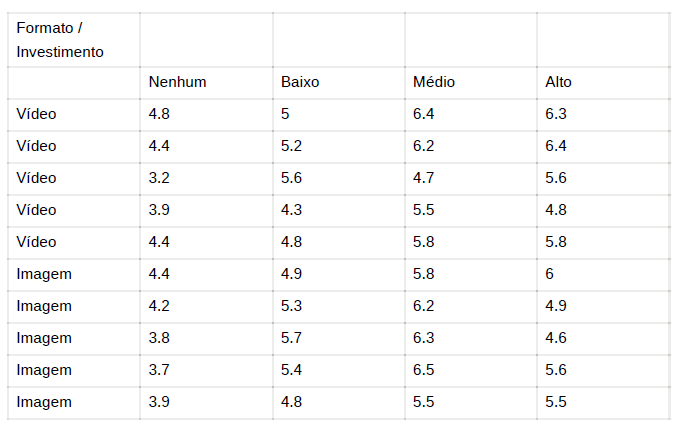

H0: Não há uma diferença significativa do CTR entre os 3 grupos<br>
H1: Há há uma diferença significativa do CTR entre os 3 grupos

In [63]:
#Two-Way ANOVA
# Dados ajustados para refletir a estrutura correta
data = {
    "formato": ["Vídeo", "Vídeo", "Vídeo", "Vídeo", "Vídeo", 
                "Imagem", "Imagem", "Imagem", "Imagem", "Imagem",
                "Vídeo", "Vídeo", "Vídeo", "Vídeo", "Vídeo", 
                "Imagem", "Imagem", "Imagem", "Imagem", "Imagem",
                "Vídeo", "Vídeo", "Vídeo", "Vídeo", "Vídeo", 
                "Imagem", "Imagem", "Imagem", "Imagem", "Imagem",
                "Vídeo", "Vídeo", "Vídeo", "Vídeo", "Vídeo", 
                "Imagem", "Imagem", "Imagem", "Imagem", "Imagem"],
    "investimento": ["Nenhum", "Nenhum", "Nenhum", "Nenhum", "Nenhum", 
                     "Nenhum", "Nenhum", "Nenhum", "Nenhum", "Nenhum",
                     "Baixo", "Baixo", "Baixo", "Baixo", "Baixo",
                     "Baixo", "Baixo", "Baixo", "Baixo", "Baixo",
                     "Médio", "Médio", "Médio", "Médio", "Médio",
                     "Médio", "Médio", "Médio", "Médio", "Médio",
                     "Alto", "Alto", "Alto", "Alto", "Alto",
                     "Alto", "Alto", "Alto", "Alto", "Alto"],
    "ctr": [4.8, 4.4, 3.2, 3.9, 4.4, 
             4.4, 4.2, 3.8, 3.7, 3.9,
             5.0, 5.2, 5.6, 4.3, 4.8, 
             4.9, 5.3, 5.7, 5.4, 4.8,
             6.4, 6.2, 4.7, 5.5, 5.8, 
             5.8, 6.2, 6.3, 6.5, 5.5,
             6.3, 6.4, 5.6, 4.8, 5.8, 
             6.0, 4.9, 4.6, 5.6, 5.5]
}

# Criando o DataFrame
df = pd.DataFrame(data)

#Rodar uma regressão antes do anova
model = ols('ctr ~ C(formato) + C(investimento) + C(formato):C(investimento)',data=df).fit()
infos = sm.stats.anova_lm(model,typ=2)
print('formato:p-value:{}'.format(infos['PR(>F)'][0]))
print('investimento:p-value:{}'.format(infos['PR(>F)'][1])) #única variável que tem uma significância que consegue ajudar a explicar os valores do ctr
print('investimento + formato:p-value:{}'.format(infos['PR(>F)'][2]))

if (infos['PR(>F)'][0] <= 0.05) | (infos['PR(>F)'][1] <= 0.05) | (infos['PR(>F)'][2] <= 0.05):
  print('Rejeita a hipótese nula')
  print('Conclusão: Há evidências suficiente que há uma diferença significativa no CTR entre os grupos')
  if infos['PR(>F)'][0] <= 0.05:
    print('A variável formato apresenta significância para explicar essa diferença')
  elif infos['PR(>F)'][1] <= 0.05:
    print('A variável investimento apresenta significância para explicar essa diferença')
  elif infos['PR(>F)'][2] <= 0.05:
    print('A combinação das variáveis investimento e formato apresenta significância para explicar essa diferença')
else:
  print('Falha em rejeitar a hipótese nula')
  print('Conclusão: Não há evidências suficiente que há uma diferença significativa no CTR entre os grupos')

formato:p-value:0.9759749658574458
investimento:p-value:3.898088297042028e-08
investimento + formato:p-value:0.31089772240901203
Rejeita a hipótese nula
Conclusão: Há evidências suficiente que há uma diferença significativa no CTR entre os grupos
A variável investimento apresenta significância para explicar essa diferença


C:\Users\ian-g\AppData\Local\Temp\ipykernel_4924\3111400210.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('formato:p-value:{}'.format(infos['PR(>F)'][0]))
C:\Users\ian-g\AppData\Local\Temp\ipykernel_4924\3111400210.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('investimento:p-value:{}'.format(infos['PR(>F)'][1])) #única variável que tem uma significância que consegue ajudar a explicar os valores do ctr
C:\Users\ian-g\AppData\Local\Temp\ipykernel_4924\3111400210.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be 